In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

pd.set_option('display.max_rows', None)   # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.width', None)     # 가로 너비 제한 없음
pd.set_option('display.max_colwidth', None)  # 컬럼 내용 생략 없이 출력

In [60]:
df = pd.read_csv('투수_EDA용 데이터_차수.csv', encoding='cp949')

In [61]:
df.columns

Index(['FA년도', '구단명', '선수명', '세부 포지션', '투', '구분', 'FA등급', '플레이년도', '나이', '게임수',
       '선발등판', '구원등판', '승리', '패전', '세이브', '블론세이브', '홀드', '블론홀드', '이닝수', '자책점',
       '피안타', '2루타허용', '3루타허용', '피홈런', '볼넷허용', '사구허용', '탈삼진', '폭투', 'ERA',
       'FIP', '선발 이닝', '구원 이닝', '선발 WAR', '구원 WAR', '종합 WAR', '연봉', '비고1',
       '잔류 여부', 'FA 계약 연수', 'FA 계약 총액', '사사구', '완투', '완봉', '투구수', '피장타율',
       '원클럽맨여부', '득점파크팩터', '홈런파크팩터', '장타파크팩터', '국대출전횟수', '구종1', '구종2',
       '구종1 구종가치', 'AAV'],
      dtype='object')

### AAV 추가

In [62]:
df.drop(columns=['AAV'], inplace=True)

In [63]:
df1 = df.groupby('선수명', as_index=False).agg({
    'FA 계약 총액': 'sum',
    'FA 계약 연수': 'sum'
})

# AAV 컬럼 생성 (총액 ÷ 연수)
df1['AAV'] = df1['FA 계약 총액'] / df1['FA 계약 연수']

# 결과 확인
print(df1.head())

       선수명  FA 계약 총액  FA 계약 연수            AAV
0  강영식(1차)    170000         4   42500.000000
1  강윤구(1차)         0         0            NaN
2      고영표   1070000         5  214000.000000
3  고효준(1차)     12000         1   12000.000000
4      구창모   1250000         6  208333.333333


In [64]:
df = df.merge(df1[['선수명', 'AAV']], on='선수명', how='left')

In [65]:
df.head()

,FA년도,구단명,선수명,세부 포지션,투,구분,FA등급,플레이년도,나이,게임수,선발등판,구원등판,승리,패전,세이브,블론세이브,홀드,블론홀드,이닝수,자책점,피안타,2루타허용,3루타허용,피홈런,볼넷허용,사구허용,탈삼진,폭투,ERA,FIP,선발 이닝,구원 이닝,선발 WAR,구원 WAR,종합 WAR,연봉,비고1,잔류 여부,FA 계약 연수,FA 계약 총액,사사구,완투,완봉,투구수,피장타율,원클럽맨여부,득점파크팩터,홈런파크팩터,장타파크팩터,국대출전횟수,구종1,구종2,구종1 구종가치,AAV
0,2011,롯데,강영식(1차),RP,좌투,자격유지,A,2010,29,63,0,63,3,3,2,3,7,0,52.2,26,50,6,4,6,24,1,58,5,4.44,3.40,0.0,52.2,0.0,1.09,1.09,12000,고졸,잔류,0,0,25,0,0,907,0.412,0,1032.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
1,2012,롯데,강영식(1차),RP,좌투,자격유지,A,2011,30,64,0,64,2,1,1,1,16,0,41.0,16,35,4,0,5,22,2,39,5,3.51,4.44,0.0,41.0,0.0,1.26,1.26,30000,고졸,잔류,0,0,24,0,0,731,0.360,0,1044.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
2,2013,롯데,강영식(1차),RP,좌투,자격유지,A,2012,31,55,0,55,2,0,0,0,10,0,41.2,18,41,8,1,2,19,0,49,2,3.89,2.38,0.0,41.2,0.0,0.66,0.66,30000,고졸,잔류,0,0,19,0,0,757,0.340,0,1033.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
3,2014,롯데,강영식(1차),RP,좌투,자격유지,A,2013,32,55,0,55,1,3,1,2,9,0,39.2,17,32,7,0,1,19,2,40,4,3.86,3.22,0.0,39.2,0.0,0.49,0.49,30000,고졸,잔류,4,170000,21,0,0,675,0.298,0,1058.0,1128.0,1093.0,0,포심,슬라,5.0,42500.0
4,2015,롯데,강영식(1차),RP,좌투,FA 1년차,A,2014,33,52,0,52,2,5,0,4,14,0,47.0,25,46,8,1,4,24,2,42,4,4.79,4.75,0.0,47.0,0.0,1.18,1.18,30000,고졸,잔류,0,0,26,0,0,813,0.393,0,1045.0,1102.0,1062.0,0,포심,슬라,-5.6,42500.0


In [66]:
#df.to_csv('투수_EDA용 데이터_차수_수정.csv', index= False)

### 상관관계 계산 전

In [67]:
df_col = df.copy()

In [68]:
df_col['n차'] = 0

# 조건: '선수명'에 '(2차)'가 포함되고, '구분'이 'FA 1년차'인 경우
mask = df_col['선수명'].str.contains(r'\(2차\)') & (df_col['구분'] == 'FA 1년차')

# 해당 조건을 만족하는 행에 'n차' 값을 1로 설정
df_col.loc[mask, 'n차'] = 1

In [69]:
df_col[df_col['n차'] == 1][['선수명', '플레이년도', '구분']]

,선수명,플레이년도,구분
81,박정진(2차),2014,FA 1년차
103,손승락(2차),2016,FA 1년차
145,양현종(2차),2022,FA 1년차
163,우규민(2차),2017,FA 1년차
202,윤성환(2차),2015,FA 1년차
275,정우람(2차),2016,FA 1년차
304,차우찬(2차),2017,FA 1년차


In [70]:
df[df['선수명'] == '송은범(1차)']

,FA년도,구단명,선수명,세부 포지션,투,구분,FA등급,플레이년도,나이,게임수,선발등판,구원등판,승리,패전,세이브,블론세이브,홀드,블론홀드,이닝수,자책점,피안타,2루타허용,3루타허용,피홈런,볼넷허용,사구허용,탈삼진,폭투,ERA,FIP,선발 이닝,구원 이닝,선발 WAR,구원 WAR,종합 WAR,연봉,비고1,잔류 여부,FA 계약 연수,FA 계약 총액,사사구,완투,완봉,투구수,피장타율,원클럽맨여부,득점파크팩터,홈런파크팩터,장타파크팩터,국대출전횟수,구종1,구종2,구종1 구종가치,AAV
112,2012,SSG,송은범(1차),RP,우투,신규,A,2011,27,38,11,27,8,8,1,2,4,0,78.2,30,71,9,0,10,45,2,55,5,3.43,5.12,41.2,37.0,1.36,0.22,1.58,22000,고졸,잔류,0,0,47,0,0,1383,0.386,0,980.0,1172.0,988.0,1,NaN,NaN,NaN,85000.0
113,2013,SSG,송은범(1차),SP,우투,신규,A,2012,28,20,19,1,8,3,0,0,0,0,97.2,45,98,16,0,6,44,2,72,4,4.15,3.83,96.2,1.0,1.25,0.05,1.30,24000,고졸,잔류,0,0,46,0,0,1647,0.383,0,999.0,1172.0,988.0,1,NaN,NaN,NaN,85000.0
114,2014,KIA,송은범(1차),CP,우투,신규,A,2013,29,41,4,37,1,7,5,3,6,0,49.0,40,71,15,2,4,27,0,29,9,7.35,4.94,15.2,33.1,-0.18,-0.18,-0.36,24000,고졸,잔류,0,0,27,0,0,934,0.505,0,1022.0,1015.0,967.0,1,포심,슬라,-7.7,85000.0
115,2016,한화,송은범(1차),RP,우투,FA 1년차,A,2015,31,33,14,19,2,9,4,1,1,0,70.1,55,103,22,2,10,30,4,48,11,7.04,5.58,47.0,23.1,-0.44,0.48,0.04,45000,고졸,이적,0,0,34,0,0,1318,0.530,0,1015.0,1002.0,997.0,1,포심,슬라,-1.3,85000.0
116,2015,KIA,송은범(1차),RP,우투,신규,A,2014,30,27,11,16,4,8,0,0,0,0,78.2,64,114,16,5,11,43,5,60,12,7.32,5.90,52.2,26.0,0.27,-0.34,-0.08,30000,고졸,이적,4,340000,48,0,0,1544,0.523,0,1025.0,1039.0,1014.0,1,포심,슬라,-10.3,85000.0


In [71]:
df_col.loc[115,'선수명'] = '송은범(2차)'

은퇴,해외계약 등으로 계약부분이 null인 행과 해외 성적이 포함되어 있는 행 제거

In [72]:
df_col = df_col[df_col['선수명'] != '박정진(2차)']

In [73]:
df_col = df_col[df_col['선수명'] != '손승락(2차)']

In [74]:
df_col = df_col[df_col['선수명'] != '오승환(1차)']

In [75]:
df_col = df_col[df_col['선수명'] != '김광현(2차)']

In [76]:
df_col = df_col[df_col['선수명'] != '류현진']

In [77]:
df_col = df_col[df_col['선수명'] != '강윤구(1차)']

In [78]:
df_col = df_col[df_col['선수명'] != '김광현(3차)']

In [79]:
#df_col = df_col[df_col['구분'] != 'FA 1년차']

In [80]:
df_col = df_col[~((df_col['구분'] == 'FA 1년차') & (df_col['n차'] == 0))]

In [81]:
df_col['n차'].value_counts()

n차
0    276
1      5
Name: count, dtype: int64

In [82]:
df_col['세부 포지션'].unique()

array(['RP', 'SP', 'CP'], dtype=object)

In [83]:
df_col['투'].unique()

array(['좌투', '우사', '우언', '우투'], dtype=object)

In [84]:
df_col['구분'].unique()

array(['자격유지', '신규', '재자격', 'FA 1년차', '다년계약'], dtype=object)

In [85]:
df_col['FA등급'].unique()

array(['A', 'C', 'B', '다년계약'], dtype=object)

In [86]:
df_col['비고1'].unique()

array(['고졸', '신규 35세 23년 C등급', '35세 이상', '대졸', '신규 35세 해외 복귀', '23년 B등급',
       '다년계약'], dtype=object)

In [87]:
# 1. 조건에 맞는 선수명 추출
filtered_names = df_col[(df_col['선발 이닝'] > 15) & (df_col['구원 이닝'] > 10)]['선수명'].unique()

# 2. 해당 선수들의 모든 행 추출
matched_rows = df_col[df_col['선수명'].isin(filtered_names)]

# 3. 원하는 컬럼만 선택
result = matched_rows[['선수명', '플레이년도', '선발 이닝', '구원 이닝','선발등판', '구원등판']]

# 결과 확인
result

,선수명,플레이년도,선발 이닝,구원 이닝,선발등판,구원등판
9,고효준(1차),2016,26.1,19.2,6,18
10,고효준(1차),2017,4.2,35.1,1,39
11,고효준(1차),2018,0.0,32.1,0,43
12,고효준(1차),2019,0.0,62.1,0,75
24,금민철(1차),2015,19.1,2.2,5,2
25,금민철(1차),2016,5.1,21.0,2,12
26,금민철(1차),2017,24.0,30.0,7,29
27,금민철(1차),2018,156.1,0.0,29,0
29,김광현(1차),2013,127.2,5.1,22,3
30,김광현(1차),2014,173.2,0.0,28,0


In [89]:
df_col.to_csv('투수_머신러닝용_데이터.csv',index =False)

# 4년 통산/평균 상관관계

### 상관관계 종합 war

In [88]:

from scipy.stats import pearsonr

# 1. 선수명별로 종합 WAR와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '종합 WAR': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])

# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['종합 WAR'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.823


In [77]:
grouped[['선수명']]

,선수명
0,강영식(1차)
1,고영표
2,고효준(1차)
3,구창모
4,권오준(1차)
5,권혁(1차)
6,금민철(1차)
7,김광현(1차)
8,김대우(1차)
9,김사율(1차)


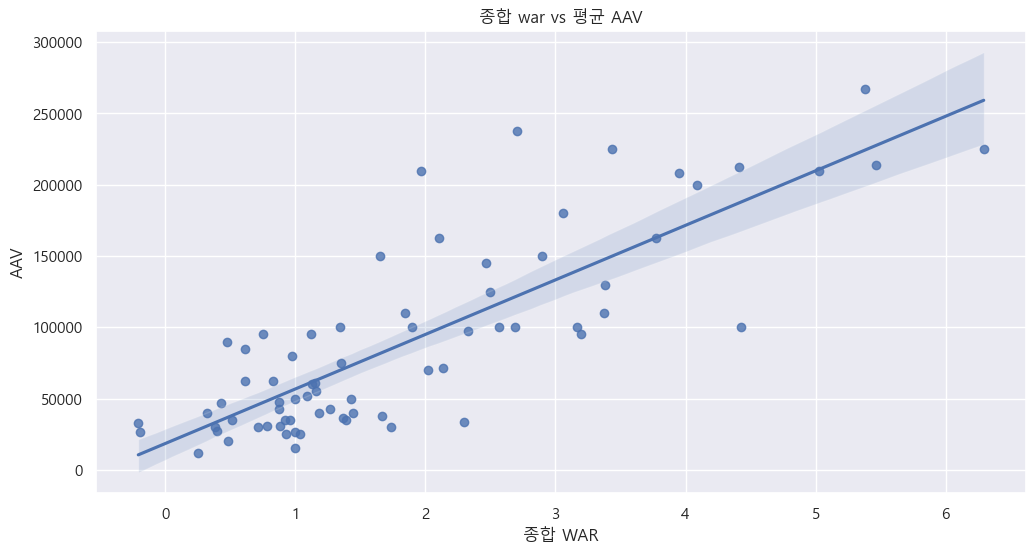

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='종합 WAR', y='AAV')
plt.title('종합 war vs 평균 AAV')
plt.show()

### 상관관계 선발 war

In [83]:
# 1. 선수명별로 선발 war와 AAV 평균, 선발 이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '선발 WAR': 'mean',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
grouped = grouped[grouped['선수명'] != '채병용(1차)']

# 3. 선발 이닝이 48을 넘는 선수만 남기기
grouped = grouped[grouped['선발 이닝'] > 48]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['선발 WAR'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.803


In [84]:
len(grouped)

32

In [120]:
grouped[['선수명']]

,선수명
1,고영표
3,구창모
7,김광현(1차)
18,문승원
19,박세웅
21,박종훈
22,배영수(1차)
23,백정현(1차)
26,송승준(1차)
32,양현종(1차)


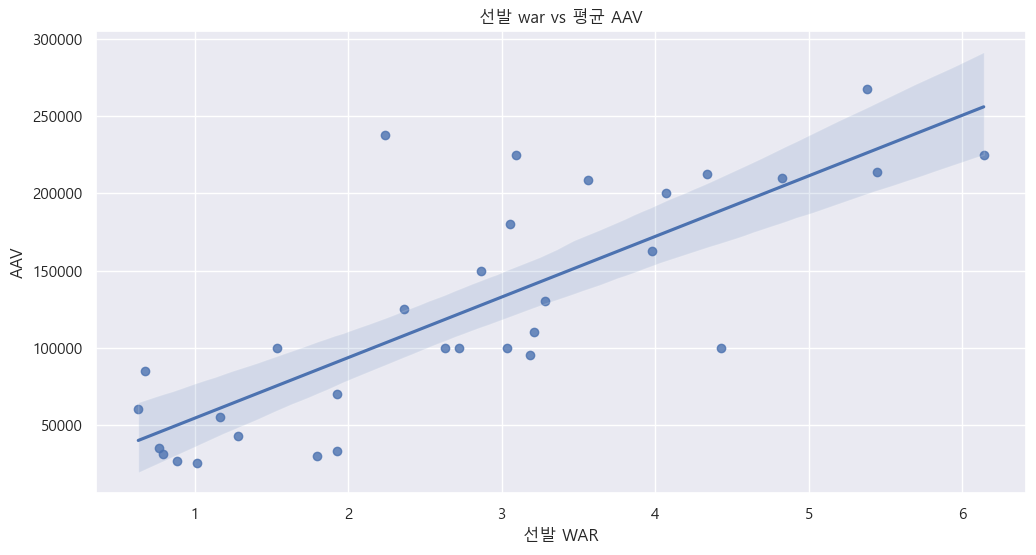

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='선발 WAR', y='AAV')
plt.title('선발 war vs 평균 AAV')
plt.show()

### 상관관계 구원 war

In [80]:
# 1. 선수명별로 구원 war, AAV, 구원이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '구원 WAR': 'mean',
    'AAV': 'mean',
    '구원 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
modified_grouped = grouped[grouped['선수명'] != '차우찬(1차)']

# 3. 추가할 선수의 데이터만 별도로 추출
player_to_add = grouped[grouped['선수명'] == '함덕주(1차)']

# 4. 제외된 데이터프레임에 원래 필터 조건 적용
filtered_without_excluded_player = modified_grouped[modified_grouped['구원 이닝'] > 28]

# 5. 필터링된 데이터프레임에 추가할 선수의 데이터 합치기
final_grouped = pd.concat([filtered_without_excluded_player, player_to_add]).drop_duplicates(subset=['선수명']).reset_index(drop=True)

# 6. 상관계수 계산
corr_coef, p_value = pearsonr(final_grouped['구원 WAR'], final_grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.644


In [81]:
len(final_grouped)

40

In [74]:
grouped['선수명']

0     강영식(1차)
2     고효준(1차)
4     권오준(1차)
5      권혁(1차)
8     김대우(1차)
9     김사율(1차)
10    김상수(1차)
11    김상수(2차)
12    김승회(1차)
13    김재윤(1차)
14    김진성(1차)
16    마일영(1차)
17    마정길(1차)
20    박정진(1차)
24    봉중근(1차)
25    손승락(1차)
28    송은범(2차)
29    심수창(1차)
31    안지만(1차)
34    오승환(2차)
35    오주원(1차)
37    우규민(2차)
38    원종현(1차)
39    유동훈(1차)
42    윤길현(1차)
46    이동현(1차)
47    이보근(1차)
49    이재영(1차)
51    이정훈(1차)
52    이태양(1차)
53    이현승(1차)
55    임창민(1차)
60    정우람(1차)
61    정우람(2차)
63    정현욱(1차)
64     주권(1차)
65    진해수(1차)
66    차우찬(1차)
68    채병용(1차)
71    홍건희(1차)
Name: 선수명, dtype: object

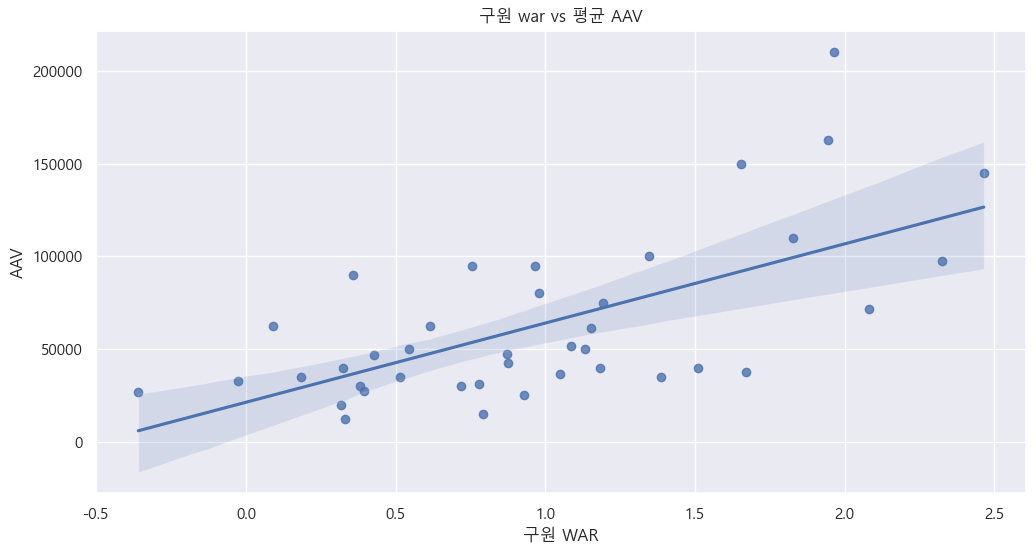

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=final_grouped, x='구원 WAR', y='AAV')
plt.title('구원 war vs 평균 AAV')
plt.show()

### 상관관계 FIP

In [177]:
# 1. 선수명별로 FIP 평균와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    'FIP': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['FIP'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.452


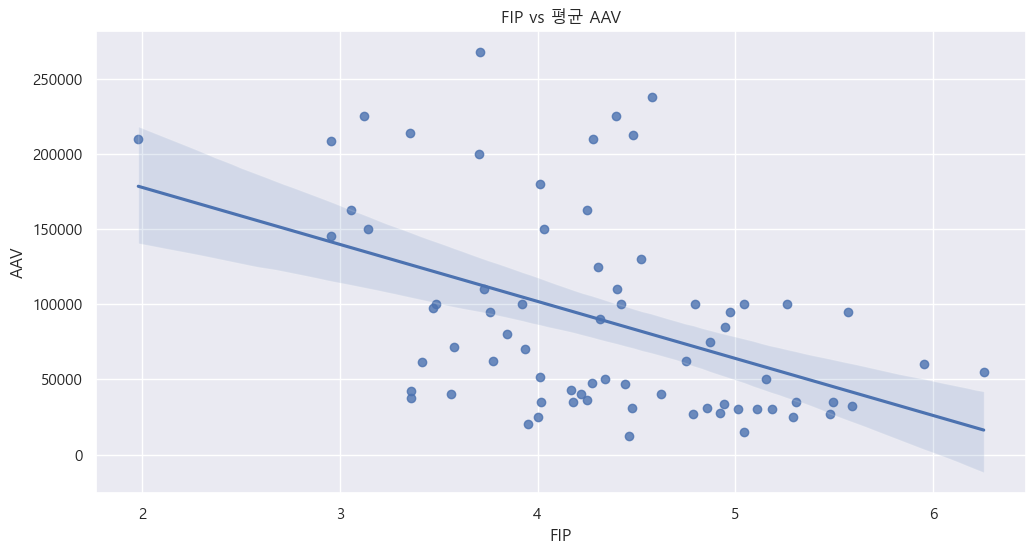

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='FIP', y='AAV')
plt.title('FIP vs 평균 AAV')
plt.show()

### 상관관계 피장타율

In [178]:
# 1. 선수명별로 피장타율 평균 와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '피장타율': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['피장타율'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.387


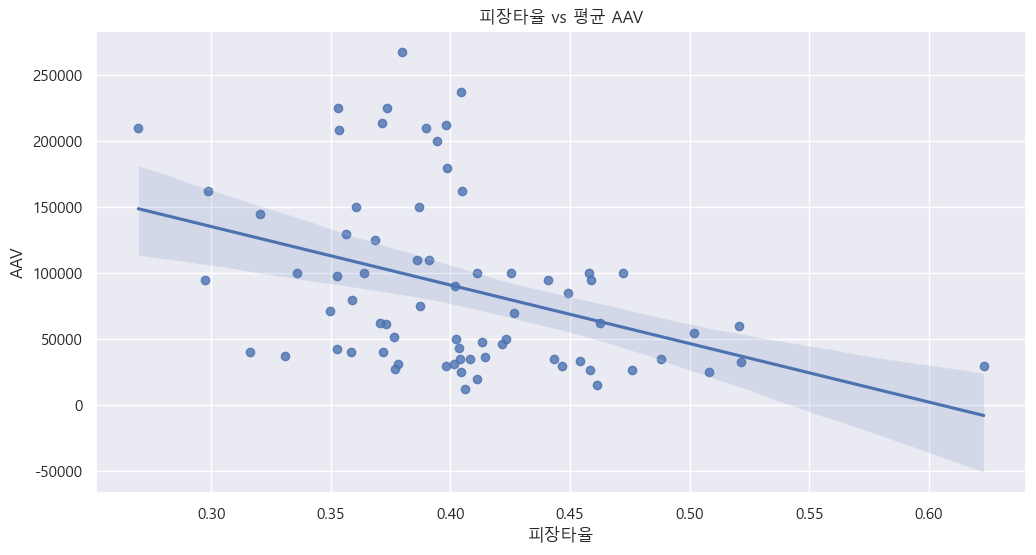

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='피장타율', y='AAV')
plt.title('피장타율 vs 평균 AAV')
plt.show()

### 상관관계 ERA*

In [40]:
# 1. 선수명별로 자책점 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '자책점': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (자책점 합계 / 이닝수 합계)
grouped['ERA*'] = (grouped['자책점'] / grouped['이닝수'])*9

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['ERA*'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.521


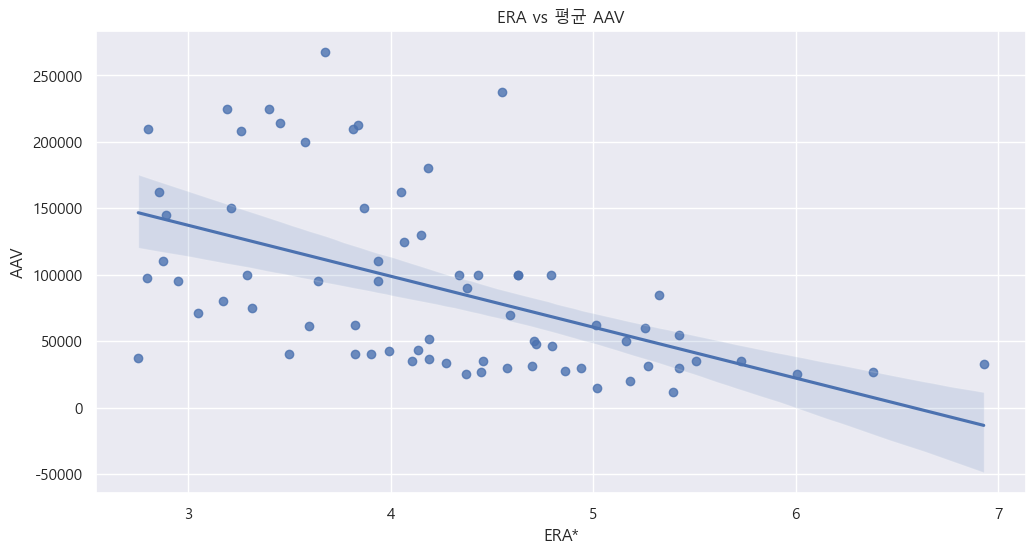

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='ERA*', y='AAV')
plt.title('ERA vs 평균 AAV')
plt.show()

### 상관관계 K/9

In [54]:
# 1. 선수명별로 탈삼진 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '탈삼진': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (탈삼진 합계 / 이닝수 합계) * 9
grouped['K/9'] = (grouped['탈삼진'] / grouped['이닝수']) * 9

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['K/9'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.241


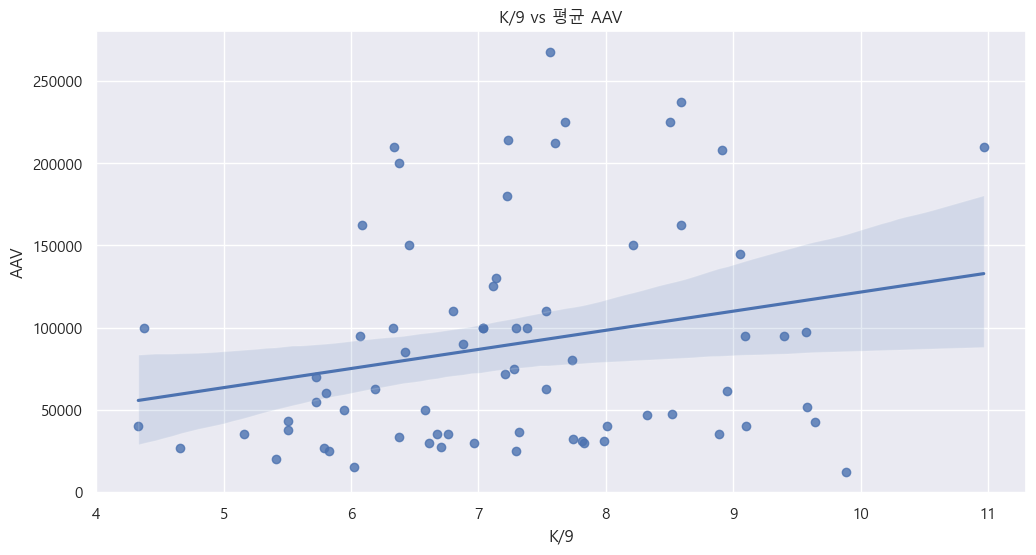

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='K/9', y='AAV')
plt.title('K/9 vs 평균 AAV')
plt.show()

### 상관관계 BB/9

In [58]:
# 1. 선수명별로 사사구 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '사사구': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (사사구 합계 / 이닝수 합계) * 9
grouped['BB/9'] = (grouped['사사구'] / grouped['이닝수']) * 9

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['BB/9'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.383


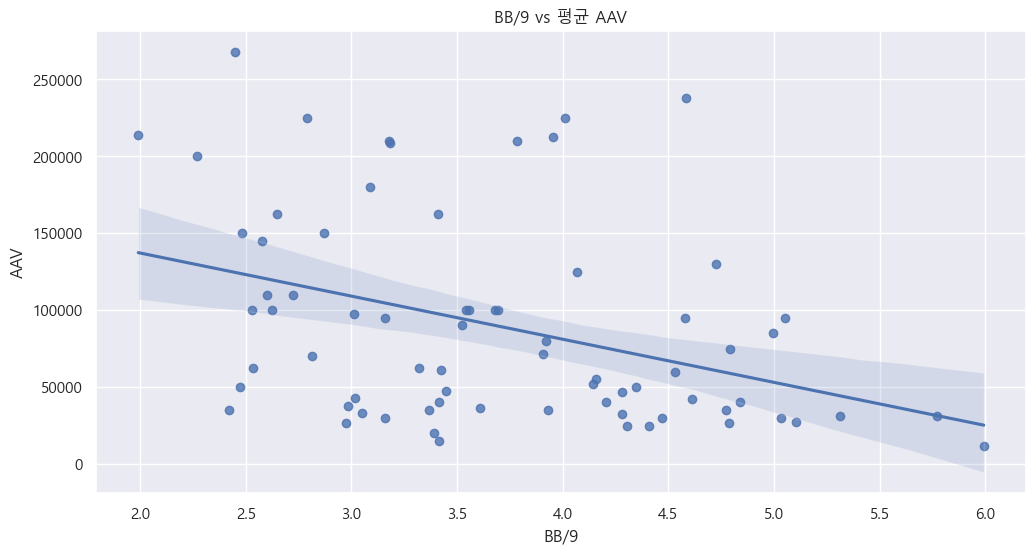

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='BB/9', y='AAV')
plt.title('BB/9 vs 평균 AAV')
plt.show()

### 상관관계 이닝수

In [43]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '이닝수': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['이닝수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.692


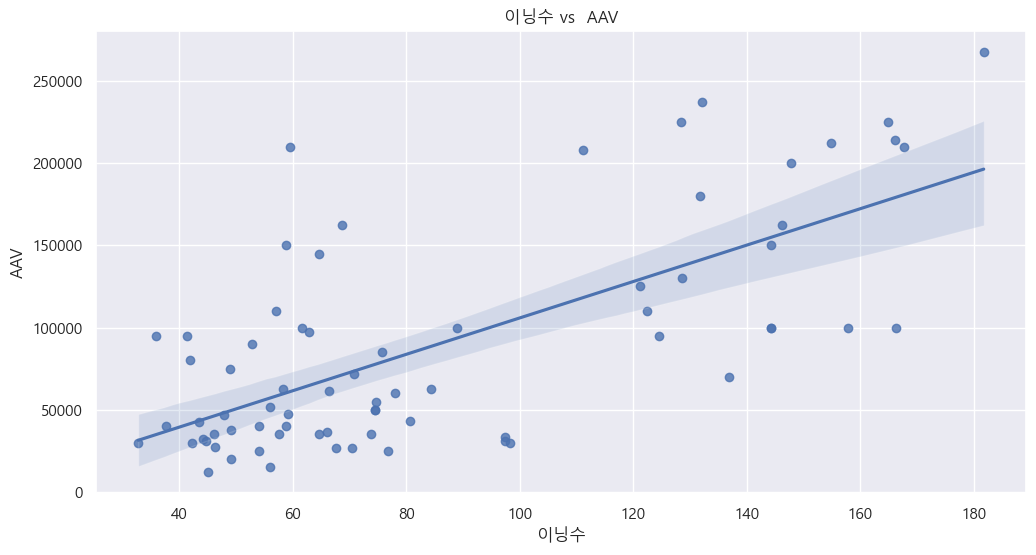

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='이닝수', y='AAV')
plt.title('이닝수 vs  AAV')
plt.show()

### 상관관계 이닝수(선발)

In [30]:
# 1. 선수명별로 선발 war와 AAV 평균, 선발 이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '이닝수': 'mean',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
grouped = grouped[grouped['선수명'] != '채병용(1차)']

# 3. 선발 이닝이 48을 넘는 선수만 남기기
grouped = grouped[grouped['선발 이닝'] > 48]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['이닝수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.739


In [37]:
# 1. 선수명별로 선발 war와 AAV 평균, 선발 이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '이닝수': 'mean',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
grouped = grouped[grouped['선수명'] != '채병용(1차)']

# 3. 선발 이닝이 48을 넘는 선수만 남기기
grouped = grouped[grouped['선발 이닝'] > 48]

grouped = grouped[grouped['이닝수']>100]
# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['이닝수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.307


In [122]:
grouped['선수명'].unique

<bound method Series.unique of 1         고영표
3         구창모
6     금민철(1차)
7     김광현(1차)
15    노경은(1차)
18        문승원
19        박세웅
21        박종훈
22    배영수(1차)
23    백정현(1차)
26    송승준(1차)
27    송은범(1차)
30    안영명(1차)
32    양현종(1차)
33    양현종(2차)
36    우규민(1차)
40    유희관(1차)
41    윤규진(1차)
43    윤석민(1차)
44    윤성환(1차)
45    윤성환(2차)
48    이용찬(1차)
50    이재학(1차)
54    임찬규(1차)
56    장민재(1차)
57    장시환(1차)
58    장원삼(1차)
59    장원준(1차)
62    정찬헌(1차)
66    차우찬(1차)
67    차우찬(2차)
69    한현희(1차)
Name: 선수명, dtype: object>

In [123]:
len(grouped)

32

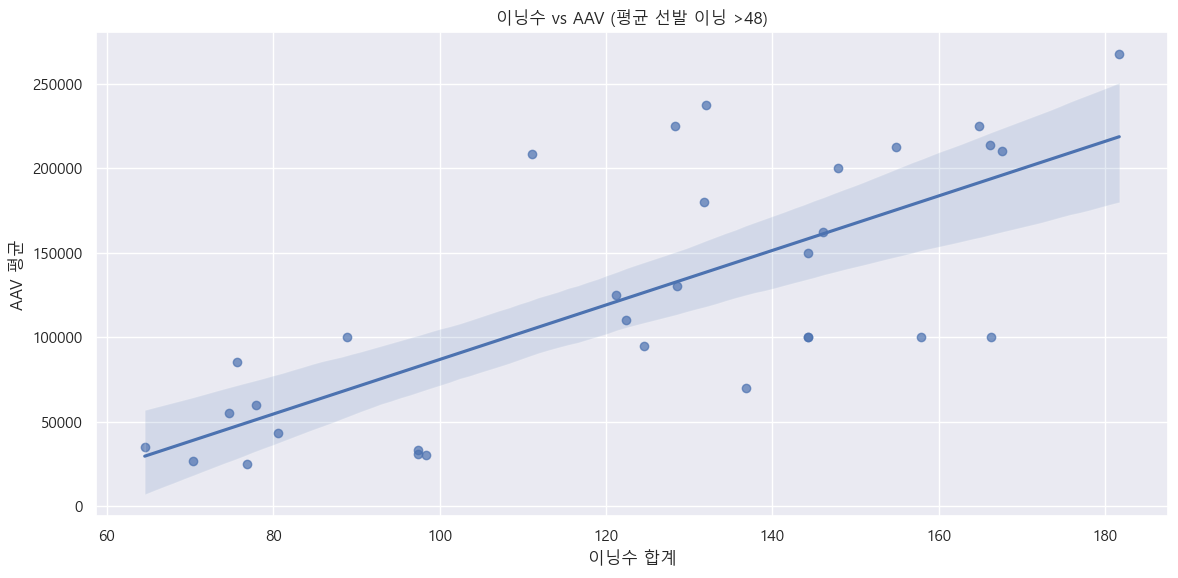

In [36]:
# 산점도 및 회귀선 시각화
sns.regplot(data=grouped, x='이닝수', y='AAV', scatter_kws={'alpha':0.7})
plt.title('이닝수 vs AAV (평균 선발 이닝 >48)')
plt.xlabel('이닝수 합계')
plt.ylabel('AAV 평균')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수 (구원)

In [38]:
# 1. 선수명별로 구원 war, AAV, 구원이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '이닝수': 'mean',
    'AAV': 'mean',
    '구원 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
modified_grouped = grouped[grouped['선수명'] != '차우찬(1차)']

# 3. 추가할 선수의 데이터만 별도로 추출
player_to_add = grouped[grouped['선수명'] == '함덕주(1차)']

# 4. 제외된 데이터프레임에 원래 필터 조건 적용
filtered_without_excluded_player = modified_grouped[modified_grouped['구원 이닝'] > 28]

# 5. 필터링된 데이터프레임에 추가할 선수의 데이터 합치기
final_grouped = pd.concat([filtered_without_excluded_player, player_to_add]).drop_duplicates(subset=['선수명']).reset_index(drop=True)

# 6. 상관계수 계산
corr_coef, p_value = pearsonr(final_grouped['이닝수'], final_grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.218


In [97]:
len(final_grouped)

40

In [98]:
final_grouped['선수명'].unique

<bound method Series.unique of 0     강영식(1차)
1     고효준(1차)
2     권오준(1차)
3      권혁(1차)
4     김대우(1차)
5     김사율(1차)
6     김상수(1차)
7     김상수(2차)
8     김승회(1차)
9     김재윤(1차)
10    김진성(1차)
11    마일영(1차)
12    마정길(1차)
13    박정진(1차)
14    봉중근(1차)
15    손승락(1차)
16    송은범(2차)
17    심수창(1차)
18    안지만(1차)
19    오승환(2차)
20    오주원(1차)
21    우규민(2차)
22    원종현(1차)
23    유동훈(1차)
24    윤길현(1차)
25    이동현(1차)
26    이보근(1차)
27    이재영(1차)
28    이정훈(1차)
29    이태양(1차)
30    이현승(1차)
31    임창민(1차)
32    정우람(1차)
33    정우람(2차)
34    정현욱(1차)
35     주권(1차)
36    진해수(1차)
37    채병용(1차)
38    홍건희(1차)
39    함덕주(1차)
Name: 선수명, dtype: object>

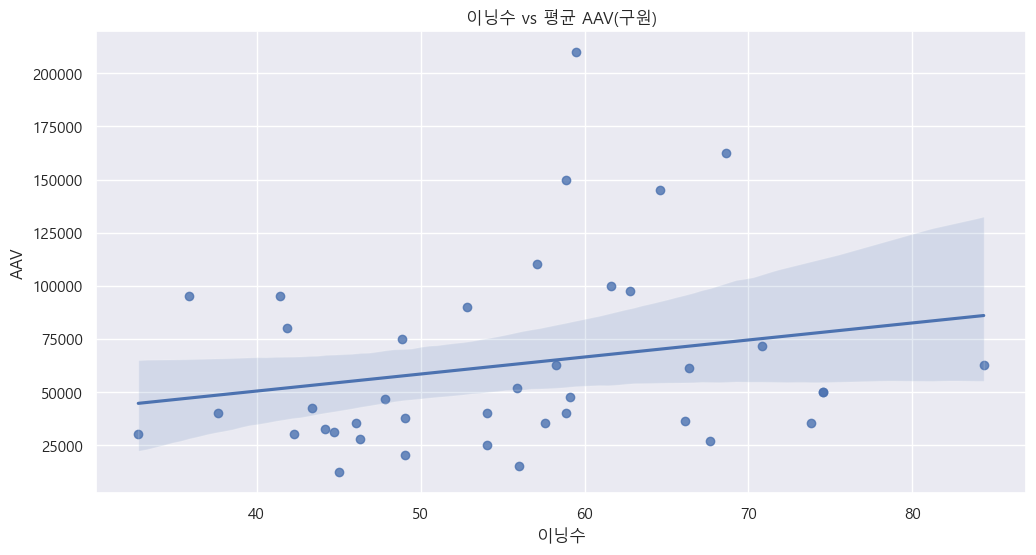

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=final_grouped, x='이닝수', y='AAV')
plt.title('이닝수 vs 평균 AAV(구원)')
plt.show()

### 상관관계 투구수

In [201]:
# 1. 선수명 단위로 투구수 합계, AAV 평균 계산
grouped = df_col.groupby('선수명').agg({
    '투구수': 'sum',
    'AAV': 'mean',
    
}).reset_index()

# 2. 평균 구원 이닝이 24보다 큰 선수만 필터링
#filtered = grouped[grouped['구원 이닝'] > 24]

# 3. 결측치 및 이닝수 0 제거
#filtered = filtered.dropna(subset=['이닝수', 'AAV'])
#filtered = filtered[filtered['이닝수'] > 0]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['투구수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.626


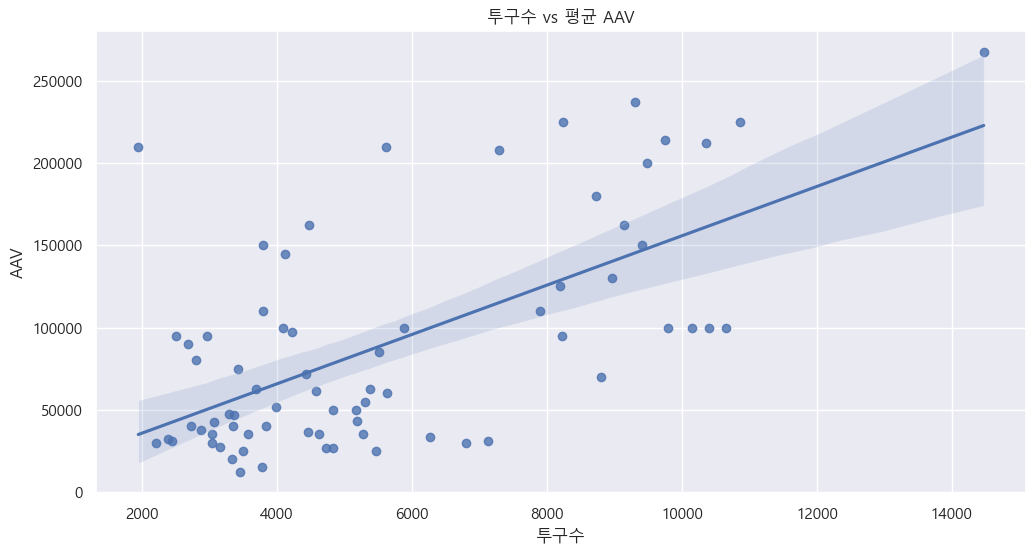

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='투구수', y='AAV')
plt.title('투구수 vs 평균 AAV')
plt.show()

### 상관관계 투구수(선발)

In [101]:
# 1. 선수명별로 선발 war와 AAV 평균, 선발 이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '투구수': 'sum',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
grouped = grouped[grouped['선수명'] != '채병용(1차)']

# 3. 선발 이닝이 48을 넘는 선수만 남기기
grouped = grouped[grouped['선발 이닝'] > 48]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['투구수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.649


In [119]:
# 1. 선수명별로 선발 war와 AAV 평균, 선발 이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '투구수': 'sum',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
grouped = grouped[grouped['선수명'] != '채병용(1차)']

# 3. 선발 이닝이 48을 넘는 선수만 남기기
grouped = grouped[grouped['선발 이닝'] > 48]

grouped = grouped[grouped['투구수']>6000]
# 4. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['투구수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.562


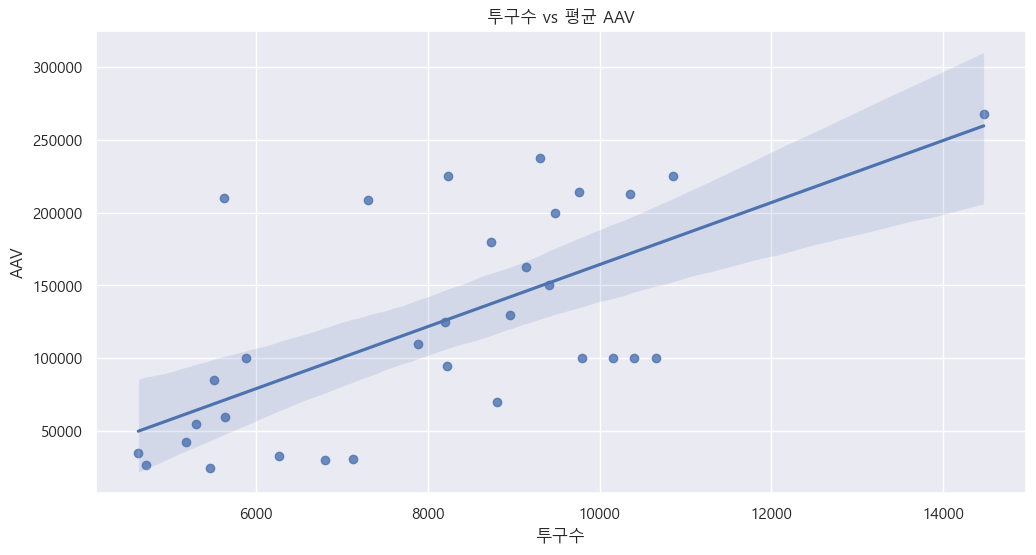

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='투구수', y='AAV')
plt.title('투구수 vs 평균 AAV')
plt.show()

### 상관관계 투구수(구원)

In [104]:
# 1. 선수명별로 구원 war, AAV, 구원이닝 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '투구수': 'sum',
    'AAV': 'mean',
    '구원 이닝': 'mean'
}).reset_index()

# 2. 특정 선수를 제외하기
modified_grouped = grouped[grouped['선수명'] != '차우찬(1차)']

# 3. 추가할 선수의 데이터만 별도로 추출
player_to_add = grouped[grouped['선수명'] == '함덕주(1차)']

# 4. 제외된 데이터프레임에 원래 필터 조건 적용
filtered_without_excluded_player = modified_grouped[modified_grouped['구원 이닝'] > 28]

# 5. 필터링된 데이터프레임에 추가할 선수의 데이터 합치기
final_grouped = pd.concat([filtered_without_excluded_player, player_to_add]).drop_duplicates(subset=['선수명']).reset_index(drop=True)

# 6. 상관계수 계산
corr_coef, p_value = pearsonr(final_grouped['투구수'], final_grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.035


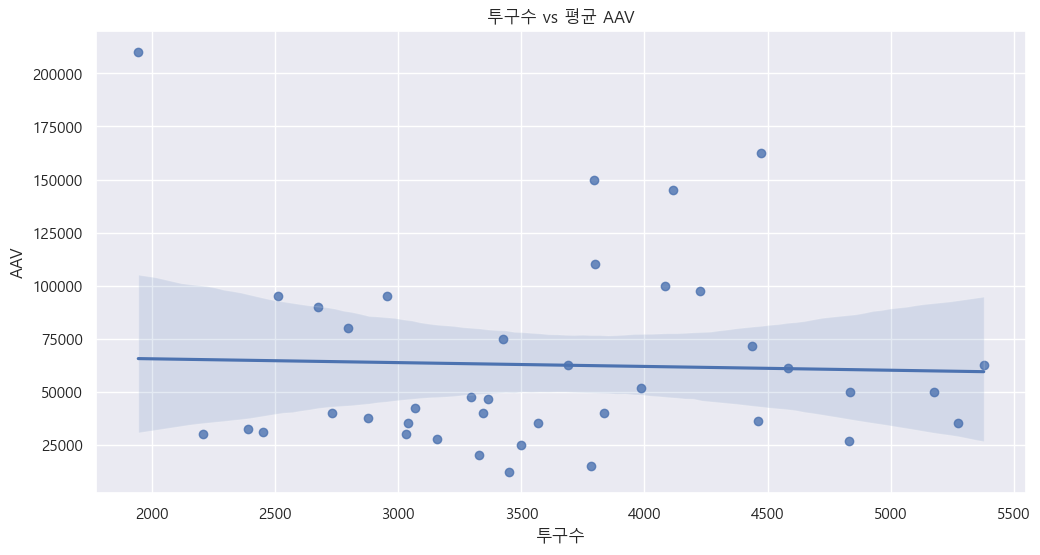

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=final_grouped, x='투구수', y='AAV')
plt.title('투구수 vs 평균 AAV')
plt.show()

# 직전년도 기록 상관관계

### 상관관계 종합 WAR

In [54]:
filtered = df_col[df_col['FA 계약 연수'] != 0]

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#filtered = filtered.dropna(subset=['이닝수', 'AAV'])

# 3. 상관계수 계산 (합/평균 아님 → 값 그대로 사용)
corr_coef, p_value = pearsonr(filtered['종합 WAR'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.713


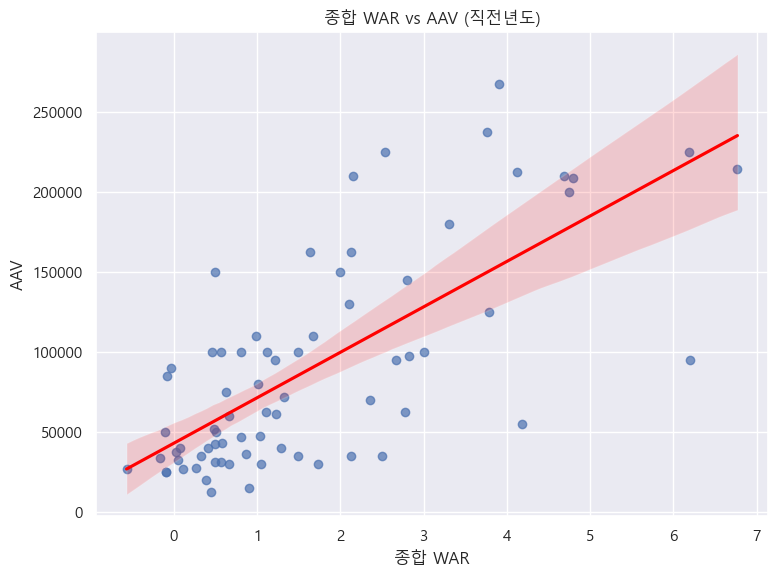

In [112]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='종합 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('종합 WAR vs AAV (직전년도)')
plt.xlabel('종합 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 선발 war

In [113]:
filtered_swar = filtered[filtered['선발 이닝'] > 48]

corr_coef, p_value = pearsonr(filtered_swar['선발 WAR'], filtered_swar['AAV'])


print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.628


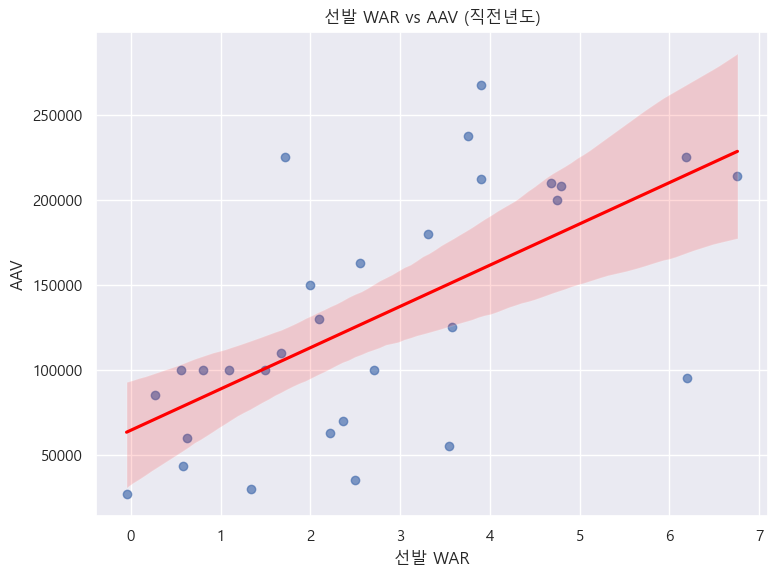

In [135]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_swar, x='선발 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('선발 WAR vs AAV (직전년도)')
plt.xlabel('선발 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 구원 war

In [114]:
filtered_rwar = filtered[filtered['구원 이닝'] >28]

corr_coef, p_value = pearsonr(filtered_rwar['구원 WAR'], filtered_rwar['AAV'])


print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.504


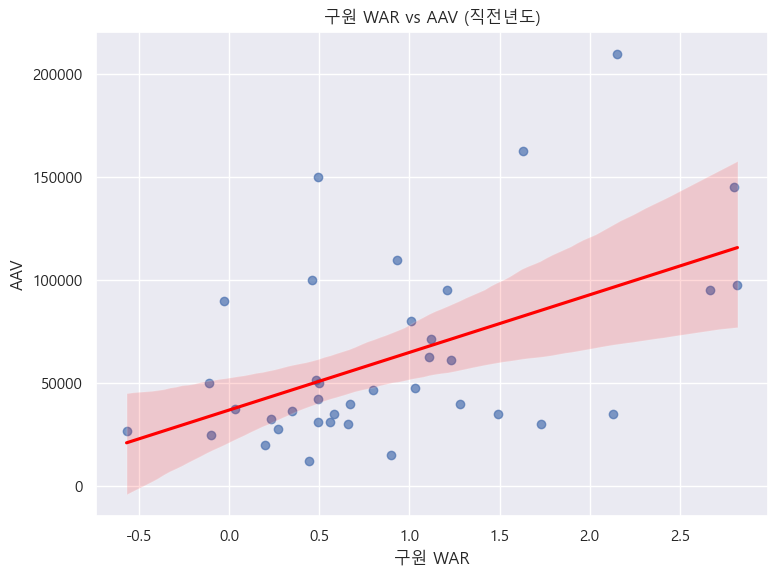

In [115]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rwar, x='구원 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('구원 WAR vs AAV (직전년도)')
plt.xlabel('구원 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 FIP

In [92]:
corr_coef, p_value = pearsonr(filtered['FIP'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.154


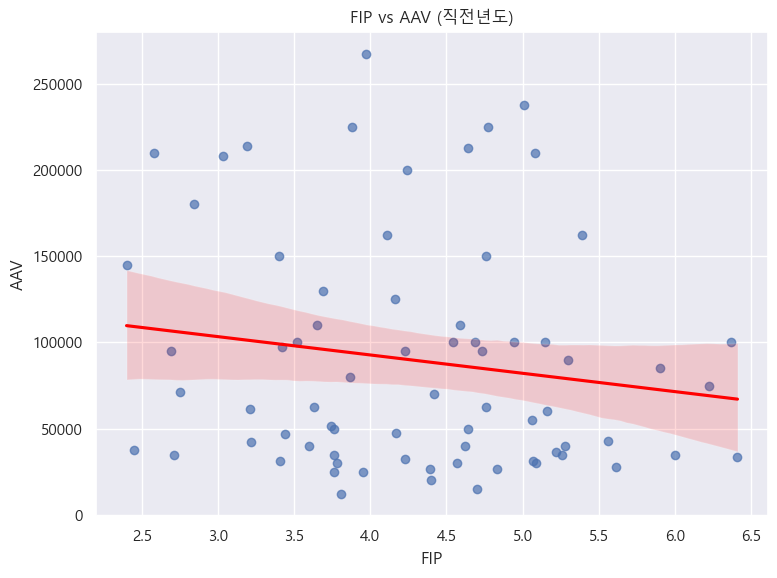

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='FIP', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('FIP vs AAV (직전년도)')
plt.xlabel('FIP')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 피장타율

In [95]:
corr_coef, p_value = pearsonr(filtered['피장타율'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.203


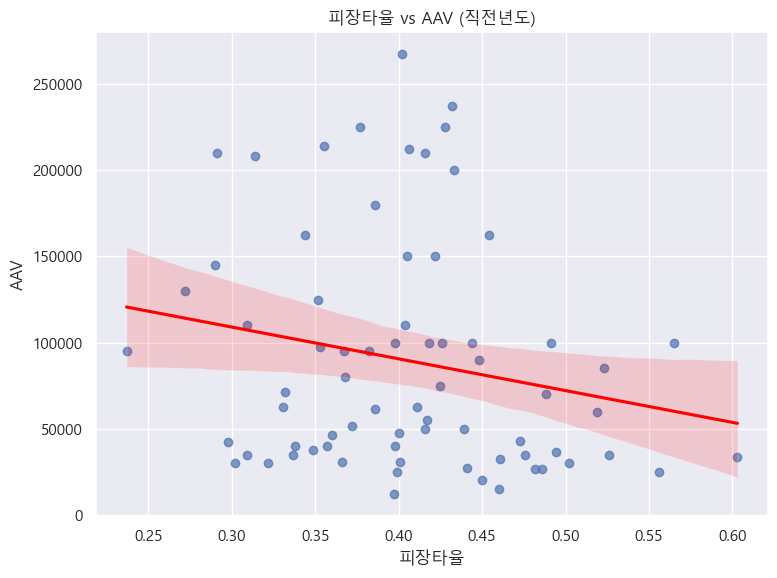

In [96]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='피장타율', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('피장타율 vs AAV (직전년도)')
plt.xlabel('피장타율')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 ERA

In [98]:
corr_coef, p_value = pearsonr(filtered['ERA'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.310


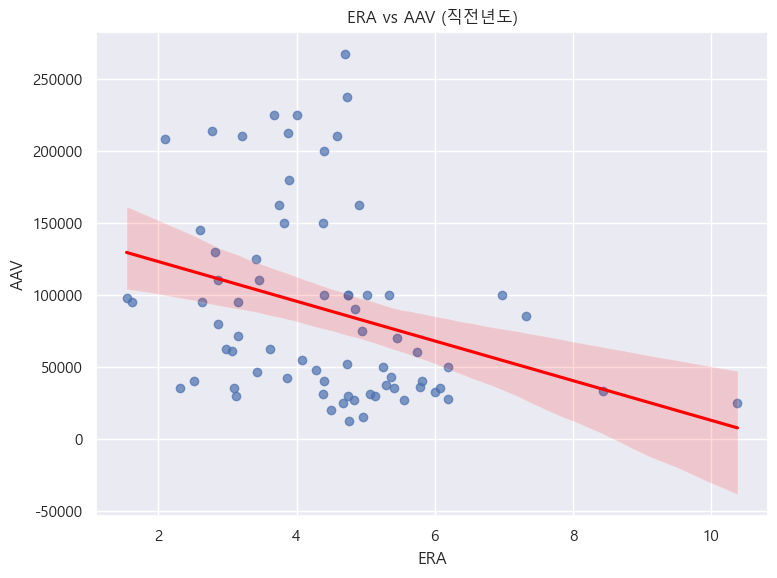

In [102]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='ERA', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('ERA vs AAV (직전년도)')
plt.xlabel('ERA')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 K/9

In [228]:
filtered['K/9'] = (filtered['탈삼진'] / filtered['이닝수']) * 9

corr_coef, p_value = pearsonr(filtered['K/9'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.130


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23920\3192996386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['K/9'] = (filtered['탈삼진'] / filtered['이닝수']) * 9


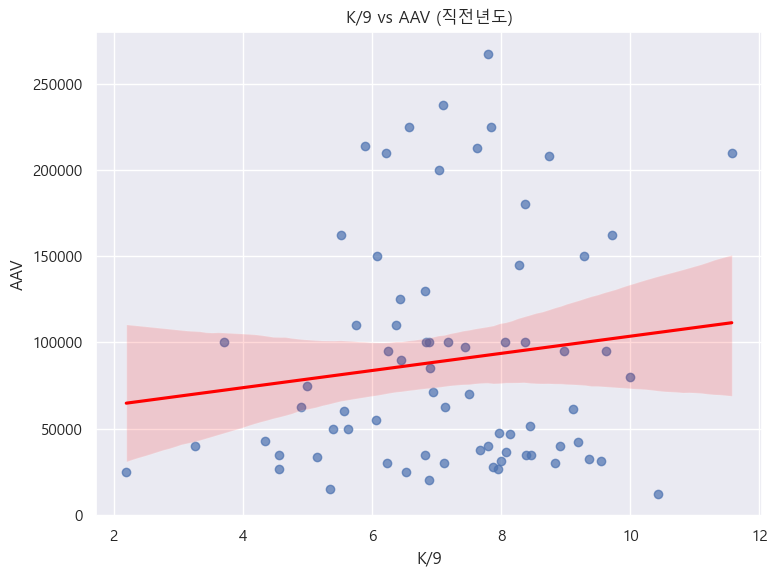

In [229]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='K/9', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('K/9 vs AAV (직전년도)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 BB/9

In [230]:
filtered['BB/9'] = (filtered['사사구'] / filtered['이닝수']) * 9

corr_coef, p_value = pearsonr(filtered['BB/9'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.209


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23920\4206709007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['BB/9'] = (filtered['사사구'] / filtered['이닝수']) * 9


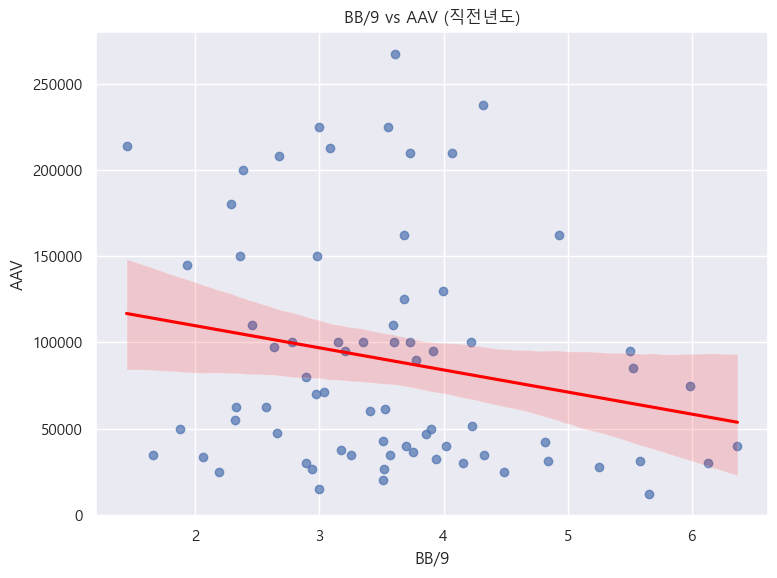

In [231]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='BB/9', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('BB/9 vs AAV (직전년도)')
plt.xlabel('BB/9')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수

In [104]:
corr_coef, p_value = pearsonr(filtered['이닝수'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.643


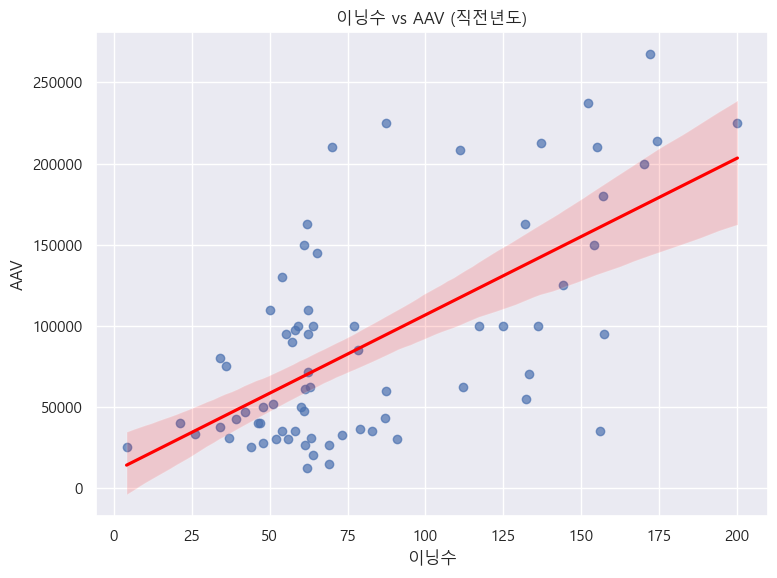

In [105]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수 (선발)

In [197]:
filtered_sip = filtered[filtered['선발 이닝'] >40]

corr_coef, p_value = pearsonr(filtered_sip['이닝수'], filtered_sip['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.515


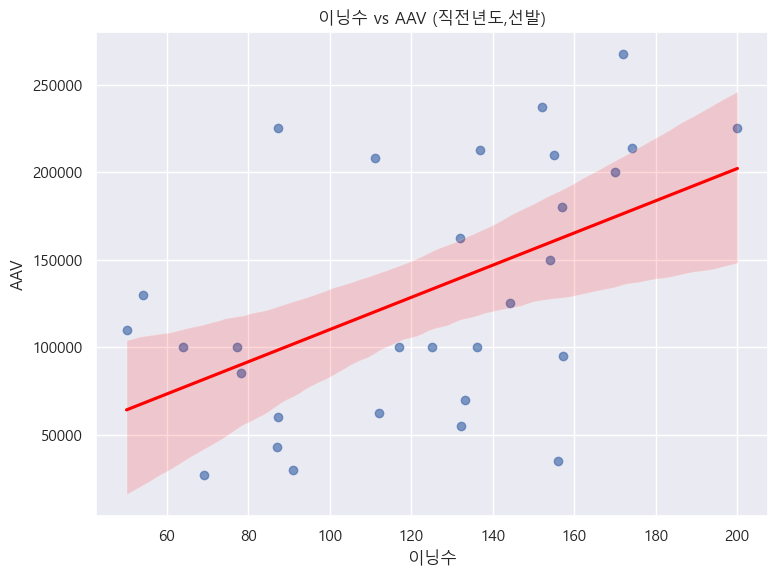

In [198]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_sip, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도,선발)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수 (구원)

In [199]:
filtered_rip = filtered[filtered['구원 이닝'] >24]

corr_coef, p_value = pearsonr(filtered_rip['이닝수'], filtered_rip['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.358


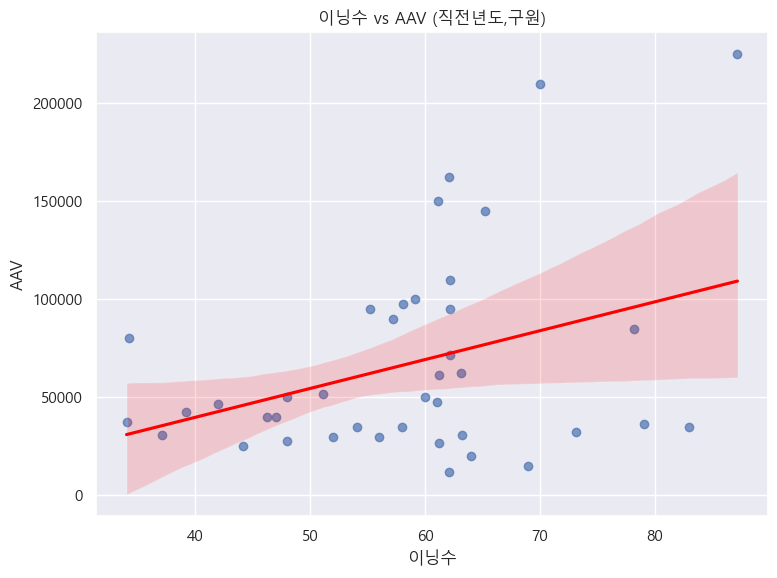

In [200]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rip, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도,구원)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 투구수

In [218]:
corr_coef, p_value = pearsonr(filtered['투구수'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.624


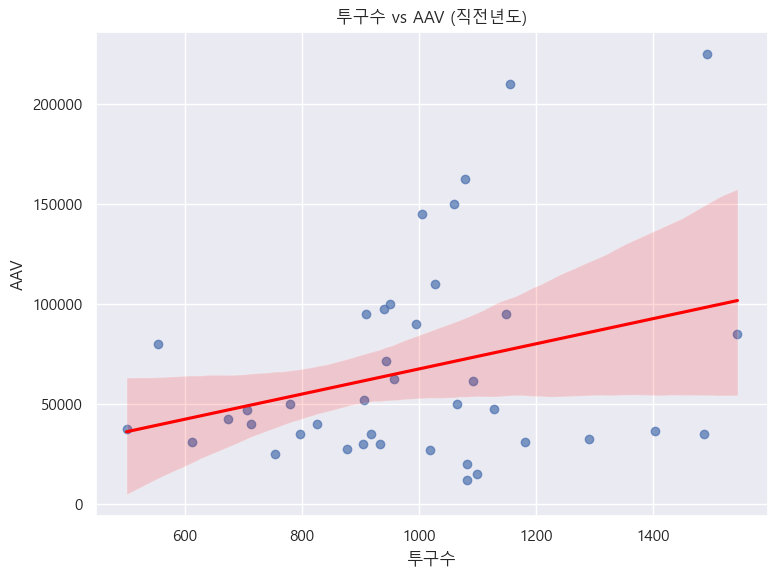

In [219]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rip, x='투구수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('투구수 vs AAV (직전년도)')
plt.xlabel('투구수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 투구수(선발)

In [220]:
filtered_snp = filtered[filtered['선발 이닝'] >40]

corr_coef, p_value = pearsonr(filtered_snp['투구수'], filtered_snp['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.481


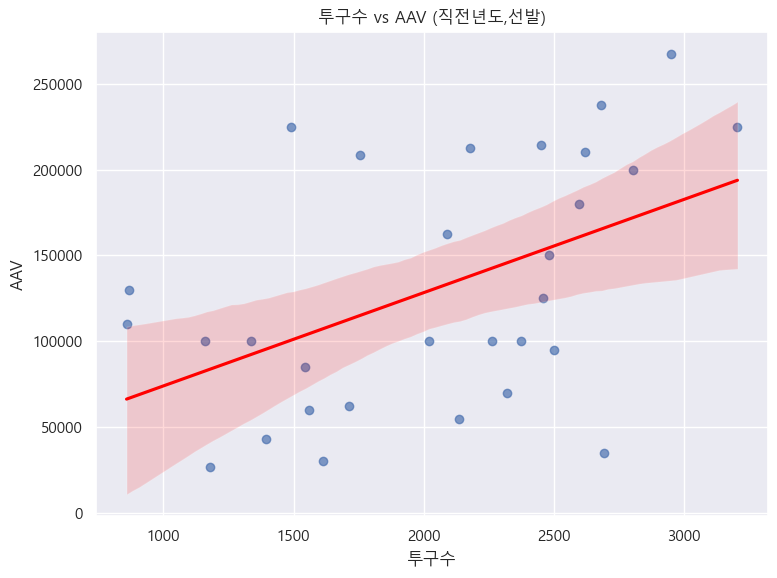

In [221]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_snp, x='투구수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('투구수 vs AAV (직전년도,선발)')
plt.xlabel('투구수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 투구수(구원)

In [222]:
filtered_rnp = filtered[filtered['구원 이닝'] >24]

corr_coef, p_value = pearsonr(filtered_rnp['투구수'], filtered_rnp['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.297


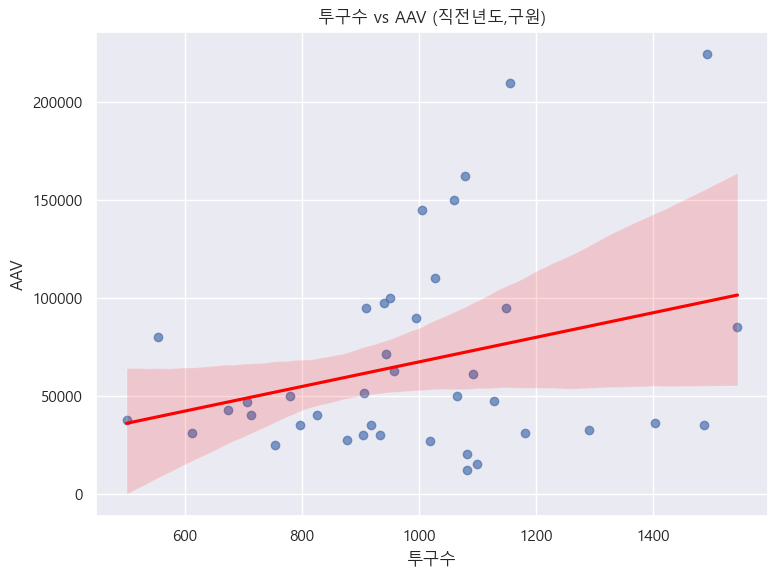

In [226]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rnp, x='투구수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('투구수 vs AAV (직전년도,구원)')
plt.xlabel('투구수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
corr_coef, p_value = pearsonr(filtered['연봉'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.537


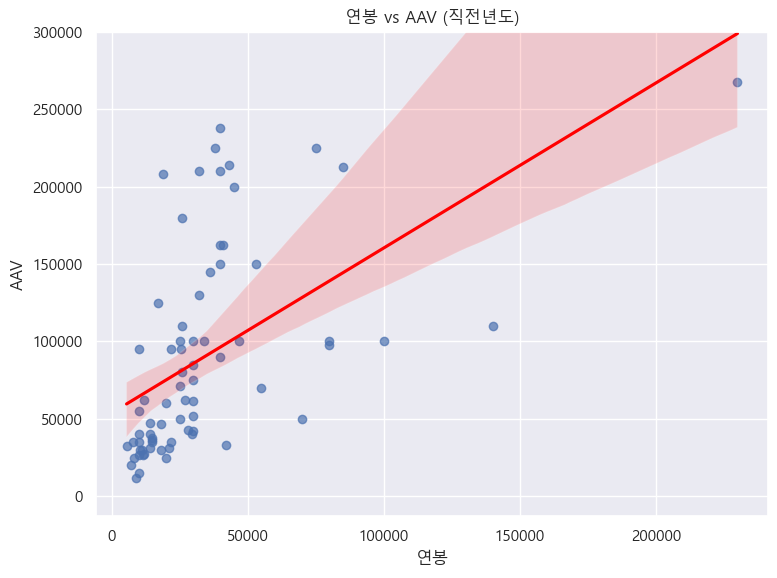

In [58]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='연봉', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('연봉 vs AAV (직전년도)')
plt.xlabel('연봉')
plt.ylabel('AAV')
plt.grid(True)
plt.ylim(top=300000)
plt.tight_layout()
plt.show()